Prueba de hipotesis en Python

https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide

In [1]:
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

rv = norm()
norm.cdf(0)
rv

extrayendo los valores de una función de probabilidad

In [7]:
norm.cdf([-2., 0, 2])

array([0.02275013, 0.5       , 0.97724987])

Calculando estadisticas

In [8]:
norm.mean(), norm.std(), norm.var()

(0.0, 1.0, 1.0)

In [9]:
norm.stats(moments="mv")

(0.0, 1.0)

Cálculo de la mediana

In [4]:
norm.ppf(0.5)

0.0

para generar datos aleatorios

In [10]:
norm.rvs(size=30)

array([-1.10533049,  2.51296429,  0.66596731, -0.11920819,  1.81080626,
        0.35584097,  1.6827014 , -2.48807784, -0.41698725,  0.53306776,
        0.13362128, -0.29170738,  0.04854639, -2.70678263, -0.24534551,
        1.1529636 , -0.73868407, -0.11709464, -1.29247997, -2.70984942,
        0.62623784,  0.90144034, -0.72165341, -0.67287555,  0.78388138,
       -1.05215653,  0.6579731 , -0.13338273,  0.58793066, -1.29304076])

**Adicionalmente se pueden usar las propiedades de norm.stats como:**

In [12]:
norm.stats(loc=6, scale=5, moments="mv")


(6.0, 25.0)

T-Statistic: -3.6173829576545917
P-Value: 0.0003492436105282561
Rechazamos la hipótesis nula. Hay evidencia suficiente para sugerir que la media es diferente de 11


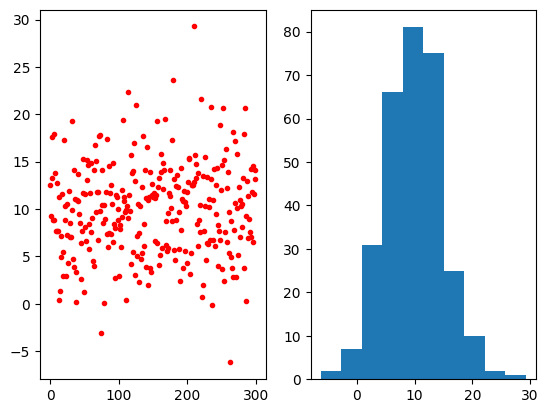

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generar datos de muestra (puedes reemplazar esto con tus propios datos)
x=np.random.seed(42)
sample_data = np.random.normal(loc=10, scale=5, size=300)
plt.subplot(1,2,1)
plt.plot(sample_data,'.r')
plt.subplot(1,2,2)
plt.hist(sample_data)
# Definir la hipótesis nula y el valor de referencia
# Hipótesis nula (H0): La media de la población es igual a 18
# Hipótesis alternativa (H1): La media de la población es diferente de 18
null_hypothesis_mean = 11

# Realizar la prueba de hipótesis (t-test de una muestra)
t_statistic, p_value = stats.ttest_1samp(sample_data, null_hypothesis_mean)

# Definir un nivel de significancia (por ejemplo, 0.05)
alpha = 0.1

# Imprimir los resultados de la prueba
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Tomar una decisión basada en el valor p
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para sugerir que la media es diferente de", null_hypothesis_mean)
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. La media es igual a", null_hypothesis_mean)


Ejemplo 1: Una investigadora en botánica quiere saber si la áltura promedio de cierta especia de planta es igual a 38 cm (hipótesis nula)

Para esto colecta una muestra aleatoria de 12 plantas y registra su altura:

(array([1., 0., 2., 0., 4., 0., 3., 0., 1., 1.]),
 array([30.48, 31.75, 33.02, 34.29, 35.56, 36.83, 38.1 , 39.37, 40.64,
        41.91, 43.18]),
 <BarContainer object of 10 artists>)

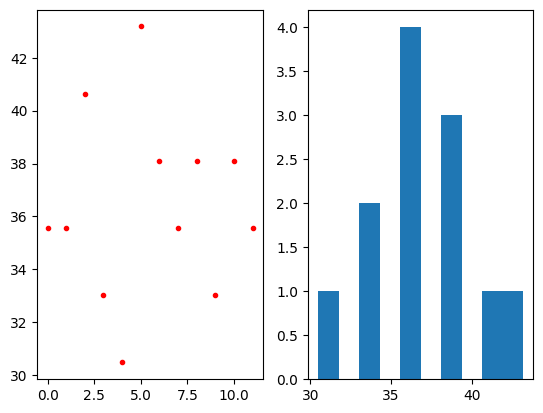

In [24]:
import numpy as np
import scipy.stats

mu = 38.5
alpha = 0.05
data = np.load("botany.npy")
data
plt.subplot(1,2,1)
plt.plot(data,'.r')
plt.subplot(1,2,2)
plt.hist(data)

Para realizar un t-test de una muestra con scipy utilizamos

In [25]:
result = scipy.stats.ttest_1samp(data, mu, alternative='two-sided')
result

TtestResult(statistic=-2.082842451186677, pvalue=0.06139579083073836, df=11)

donde

In [26]:
result.pvalue < alpha

False

**Que significa que sea falso?**

Ejemplo 2: Un médico bioregulador quiere verificar si el gasto energético promedio es menor en personas obesas que en personas no obesas

Para esto evalua una muestra al azar de personas obesas y una muestra al azar de personas delgadas y registra los resultados en la siguiente base de datos:

In [27]:
alpha = 0.05

energy, label = np.load('energy.npy').T
sample_control, sample_obese = energy[label==0], energy[label==1]

ra resolver este problema podemos utilizar un t-test de dos muestras. En este test la hipótesis nula es que las medias de ambas muestreas son equivalentes, mientras que la hipótesis alternativa puede ser

que las medias muestrales son distintas (dos colas)

que la media de la primera muestra es mayor que la de la segunda (una cola)

que la media de la primera muestra es menor que la de la segunda (una cola)

Podemos resolver un t-test de dos muestras como el del ejemplo anterior utilizando scipy con

In [28]:
result = scipy.stats.ttest_ind(sample_obese, sample_control, alternative='less')
result

TtestResult(statistic=-3.9455649161549835, pvalue=0.00039949910558502964, df=20.0)

In [29]:
result.pvalue < alpha

True